<a href="https://colab.research.google.com/github/leyanetpiedra/PDI/blob/main/Practica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 4: Segmentación óptima**



*   Nelly Fernanda Torres ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Carlos Woolrich Sorroza 2082616

Profesor: Daniel Isaías López Páez  
Clase: Laboratorio de Procesamiento Digital de Imágenes




In [2]:
# Paso 1: Importar librerías necesarias
import cv2 #procesamiento de imagenes
import numpy as np #cálculos numéricos
import matplotlib.pyplot as plt #matemáticas avanzadas
from scipy.optimize import minimize #para algoritmo de optimización

# Segmentación sencilla

In [3]:
# Paso 2: Descargar y cargar imagen
!wget https://raw.githubusercontent.com/dilp90/PDI/refs/heads/main/Imagenes/Te-me_0015.jpg  #descarga la imagen ubicada en la URL proporcionada
# Cambiar "tumor.jpg" a "Te-me_0015.jpg" para que coincida con el archivo descargado
img = cv2.imread("Te-me_0015.jpg") #guarda la imagen en u entorno local
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convertir de BGR (OpenCV) a RGB

--2025-05-24 22:17:30--  https://raw.githubusercontent.com/dilp90/PDI/refs/heads/main/Imagenes/Te-me_0015.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54825 (54K) [image/jpeg]
Saving to: ‘Te-me_0015.jpg’

Te-me_0015.jpg      100%[===================>]  53.54K  --.-KB/s    in 0.06s   

2025-05-24 22:17:30 (905 KB/s) - ‘Te-me_0015.jpg’ saved [54825/54825]



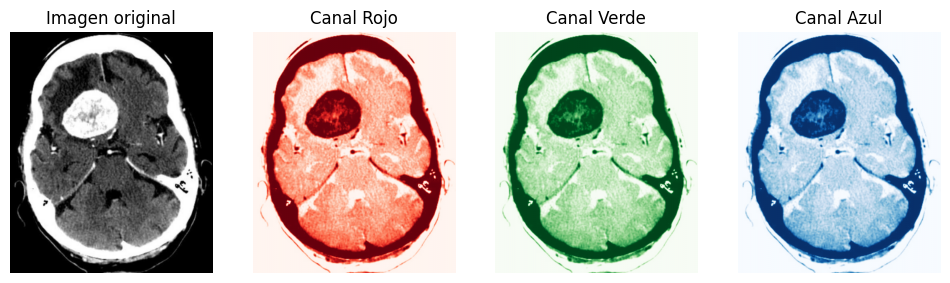

In [4]:
# Paso 3: Separar canales
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2] #se extraen los tres canales de color de una imagen en formato RGB

# Paso 4: Mostrar los canales por separado
plt.figure(figsize=(12, 4)) #crea una nueva figura para graficar
plt.subplot(1, 4, 1) #divide la figura en una rejilla de 1 fila y 4 columnas, y selecciona la primera posición (imagen original)
plt.imshow(img_rgb) #muestra la imagen original
plt.title('Imagen original') #agrega un título
plt.axis('off') #oculta los ejes

plt.subplot(1, 4, 2) #divide la figura en una rejilla de 1 fila y 4 columnas, y selecciona la segunda posición (canal rojo)
plt.imshow(R, cmap='Reds') #muestra la imagen en escala de rojos
plt.title('Canal Rojo') #agrega un título
plt.axis('off') #oculta los ejes

plt.subplot(1, 4, 3) #divide la figura en una rejilla de 1 fila y 4 columnas, y selecciona la tercer posición (canal verde)
plt.imshow(G, cmap='Greens') #muestra la imagen en escala de verdes
plt.title('Canal Verde') #agrega un título
plt.axis('off') #oculta los ejes

plt.subplot(1, 4, 4) # divide la figura en una rejilla de 1 fila y 4 columnas, y selecciona la cuarta posición (canal azul)
plt.imshow(B, cmap='Blues') #muestra la imagen en escala de azules
plt.title('Canal Azul') #agrega un título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura con las cuatro subgráficas

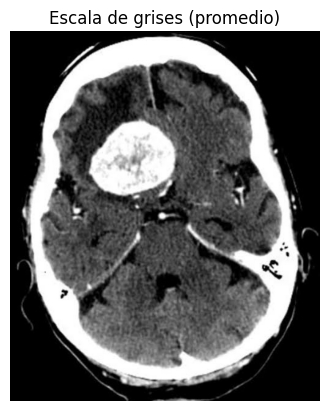

In [5]:
# Paso 5. Convertir a escala de grises promediando canales
gray_avg = ((R.astype(np.float32) + G + B) / 3).astype(np.uint8) #convierte los valores en tipo de dato float32 y lo divide entre 3 para obtener el promedio de intensidad
plt.imshow(gray_avg, cmap='gray') #muestra la imagen en escala de grises usando matplotlib
plt.title('Escala de grises (promedio)') #agrega un título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura

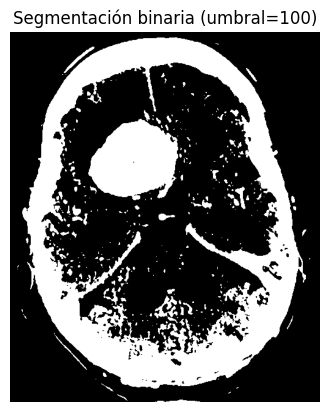

In [6]:
# Paso 6. Umbral para segmentación
umbral = 100
_, segmentada = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY) #aplica una segmentación binarizada, compuesta solo por valores 0 y 255
plt.imshow(segmentada, cmap='gray') #muestra la imagen binarizada segmentada
plt.title(f'Segmentación binaria (umbral={umbral})') #agrega un título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura

# Segmentación óptima

In [7]:
# Paso 7. Separar canales
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

#Paso 8. Normalizar canales entre 0 y 1
R_norm = R.astype(np.float32) / 255
G_norm = G.astype(np.float32) / 255
B_norm = B.astype(np.float32) / 255

# Paso 9. Función objetivo
def grayscale_variance(weights):
    w_r, w_g, w_b = weights
    gray = w_r * R_norm + w_g * G_norm + w_b * B_norm #crea una imagen en escala de grises como combinación lineal de los canales normalizados
    gray_normalized = (gray - gray.min()) / (gray.max() - gray.min()) #reescala el resultado al rango [0, 1]
    return -np.var(gray_normalized)  #calcula la varianza de la imagen y es negativo para maximizar

# Paso 10. Restricción
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}) #establece que la suma de los pesos debe ser igual a 1 para evitar que los pesos escalen de forma indebida
bounds = [(0, 1), (0, 1), (0, 1)] #establece que los pesos para R, G y B deben estar entre 0 y 1

# Paso 11. Valor inicial
initial_weights = [0.33, 0.33, 0.34] #suposición inicial cercana a igualitaria para que el optimizador comience a iterar

# Paso 12. Optimización
result = minimize(grayscale_variance, initial_weights, method='SLSQP',
                  bounds=bounds, constraints=constraints) #encontrar los pesos óptimos que maximizan la varianza
optimal_weights = result.x #guarda la mejor combinación de pesos encontrados
print("Pesos óptimos:", optimal_weights)

Pesos óptimos: [0.33 0.33 0.34]


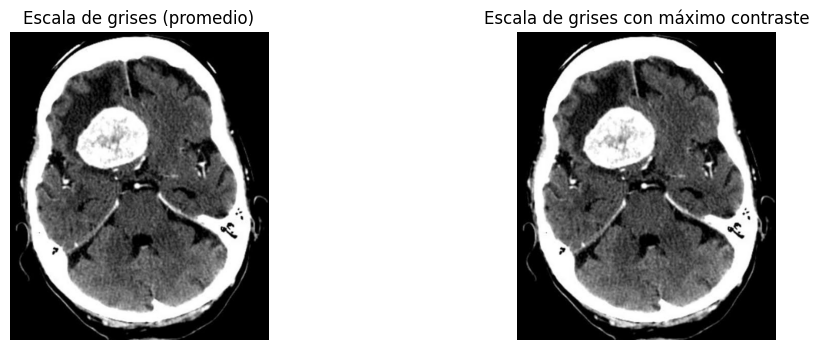

In [8]:
# Paso 13. Crear imagen en escala de grises con pesos óptimos
gray_optimal = optimal_weights[0] * R_norm + optimal_weights[1] * G_norm + optimal_weights[2] * B_norm #M}multiplica cada canal normalizado por su peso correspondiente
gray_optimal = (gray_optimal * 255).astype(np.uint8) #convierte la imagen a escala de grises a formato visualizable

# Paso 14. Mostrar resultado de manera sencilla y optimizada
plt.figure(figsize=(12, 4)) #crea una nueva figura para graficar
plt.subplot(1, 2, 1) #divide la figura en una rejilla de 1 fila y 2 columnas, y selecciona la primera posición
plt.imshow(gray_avg, cmap='gray') #imagen ontenida usando el promedio simple de los canales
plt.title('Escala de grises (promedio)') #asigna título
plt.axis('off') #oculta los ejes


plt.subplot(1, 2, 2) #divide la figura en una rejilla de 1 fila y 2 columnas, y selecciona la segunda posición
plt.imshow(gray_optimal, cmap='gray') #imagen ontenida usando los pesos óptimos para maximizar el contraste
plt.title('Escala de grises con máximo contraste') #asigna título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura

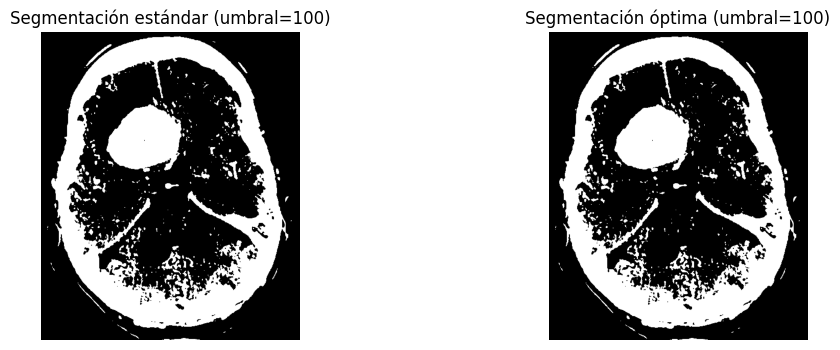

In [9]:
# Paso 15. Segmentar ambas imágenes con un mismo umbral
umbral = 100
_, seg_standard = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY) #aplica segmentación binaria a la imagen en escala de grises generada por promedio simple
_, seg_optimal = cv2.threshold(gray_optimal, umbral, 255, cv2.THRESH_BINARY) #aplica la misma segmentación pero a la imagen generada con pesos óptimos


# Paso 16. Mostrar resultado de manera sencilla y optimizada
plt.figure(figsize=(12, 4)) #crea una nueva figura para graficar
plt.subplot(1, 2, 1) #divide la figura en una rejilla de 1 fila y 2 columnas, y selecciona la primera posición
plt.imshow(seg_standard, cmap='gray') #muestra la imagen segmentada proveniente del método de promedio
plt.title(f'Segmentación estándar (umbral={umbral})') #asigna título
plt.axis('off') #oculta los ejes


plt.subplot(1, 2, 2) #divide la figura en una rejilla de 1 fila y 2 columnas, y selecciona la segunda posición
plt.imshow(seg_optimal, cmap='gray') #muestra la imagen segmentada proveniente del método con pesos optimos
plt.title(f'Segmentación óptima (umbral={umbral})') #asigna título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura

# Eliminar ruido y mostrar contornos

Área total del tumor: 200354.50 píxeles


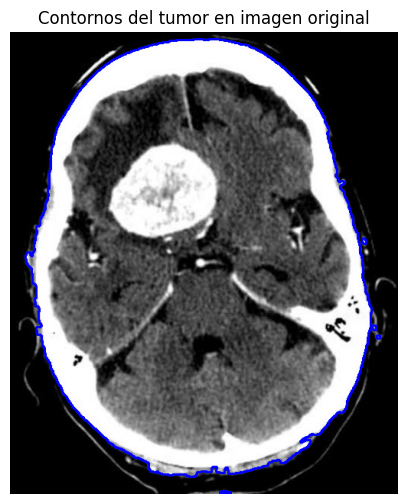

In [10]:
# Paso 17. Limpiar imagen segmentada (remover ruido)
kernel = np.ones((5, 5), np.uint8) #crea un kernel de 5x5 píxeles compuesto por unos para filtrar o modificar la imagen binaria
seg_opt_clean = cv2.morphologyEx(seg_optimal, cv2.MORPH_OPEN, kernel) #aplica una operación morfológica de apertura para eliminar pequeños objetos

# Paso 18. Contornos
contornos, _ = cv2.findContours(seg_opt_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contornos = img_rgb.copy() #crea una copia de la imagen original  para no modificarla directamente
cv2.drawContours(img_contornos, contornos, -1, (0, 0, 255), 2) #dibuja los contornos

# Paso 19. Calcular área total del tumor (en píxeles)
areas = [cv2.contourArea(c) for c in contornos]
area_total = sum(areas)
print(f"Área total del tumor: {area_total:.2f} píxeles")

# Mostrar resultado final
plt.figure(figsize=(6, 6)) #crea una nueva figura para graficar
plt.imshow(img_contornos) #muestra la fifura con contorno
plt.title("Contornos del tumor en imagen original") #asigna título
plt.axis('off') #oculta los ejes
plt.show() #muestra la figura
